나이브 베이즈(naive bayes)는 확률 기반 머신러닝 분류 알고리즘이다.  
나이브 베이즈 분류 알고리즘은 데이터를 나이브(단순)하고 독립적인 사건으로 가정하고 이 독립 사건들을 베이즈 이론(https://angeloyeo.github.io/2020/01/09/Bayes_rule.html) 에 대입시켜 가장 높은 확률의 레이블로 분류를 실행하는 알고리즘이다.  
***
가우시안 나이브 베이즈(Gaussian Naive Bayes) 분류
특징들의 값들이 정규 분포(가우시안 분포)돼 있다는 가정하에 조건부 확률을 계산하며 연속적인 성질이 있는 특성이 있는 데이터를 분류하는데 적합하다.
***
베르누이 나이브 베이즈(Bernoulli Naive Bayes) 분류
데이터의 특징이 0 또는 1로 표현됐을 때 데이터의 출현 여부에 따라서 0 또는 1로 구분되는 데이터에 사용한다.
***
다항 분포 나이브 베이즈(Multinomial Naive Bayes) 분류
데이터의 특징이 출현 횟수로 표현됐을 때 데이터의 출현 횟수에 따라 값을 달리한 데이터에 사용한다.

가우시안 나이브 베이즈를 활용한 붓꽃 분류  
iris 데이터를 활용해 데이터의 특징에 따라 붓꽃의 종류를 구분한다.

In [1]:
import pandas as pd

# 사이킷런에서 제공하는 iris 데이터를 불러오기 위해서 import 한다.
from sklearn.datasets import load_iris

# 학습 데이터와 테스트 데이터를 손쉽게 나눌 수 있도록 import 한다.
from sklearn.model_selection import train_test_split # train : 0.8 test : 0.2

# Gaussian naive bayes로 iris 데이터를 분류하기 위해 import 한다.
from sklearn.naive_bayes import GaussianNB

# 분류 성능을 측정하기 위해서 사이킷런의 metrics와 accuracy_score를 import 한다.
from sklearn import metrics
from sklearn.metrics import accuracy_score

데이터 획득  
사이킷런에서 제공하는 붓꽃(iris) 데이터 셋을 사용한다.

In [2]:
dataset = load_iris() # iris 데이터 셋을 불러온다.
# print(dataset.feature_names)
# 'sepal length (cm)': 꽃 받침 길이, 'sepal width (cm)': 꽃 받침 너비, 'petal length (cm)': 꽃잎 길이, 
# 'petal width (cm)': 꽃잎 너비
# print(dataset.target_names) # 'setosa' 'versicolor' 'virginica' => 품종
# print(dataset.target) # 'setosa' => 0 'versicolor' => 1, 'virginica' => 2
# print(dataset.data) # 데이터
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target
df.target = df.target.map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


데이터 시각화

In [3]:
#setosa_df = df[df['target'] == 'setosa']   1개 이상일때 사용 ['','']
setosa_df = df[df.target == 'setosa']
versicolor_df = df[df.target == 'versicolor']
virginica_df = df[df.target == 'virginica']

꽃받침 길이

<AxesSubplot:>

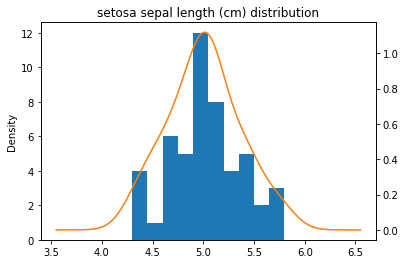

In [4]:
ax = setosa_df['sepal length (cm)'].plot(kind = 'hist')
setosa_df['sepal length (cm)'].plot(kind = 'kde',ax= ax, secondary_y = True,
                                   title = 'setosa sepal length (cm) distribution')

<AxesSubplot:>

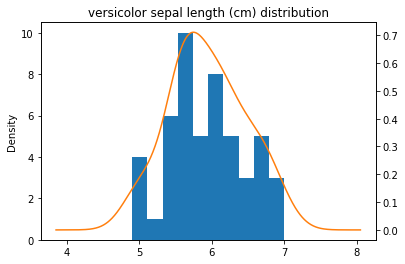

In [5]:
ax = versicolor_df['sepal length (cm)'].plot(kind = 'hist')
versicolor_df['sepal length (cm)'].plot(kind = 'kde',ax= ax, secondary_y = True,
                                   title = 'versicolor sepal length (cm) distribution')

<AxesSubplot:>

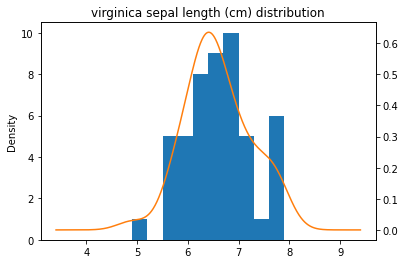

In [6]:
ax = virginica_df['sepal length (cm)'].plot(kind = 'hist')
virginica_df['sepal length (cm)'].plot(kind = 'kde',ax= ax, secondary_y = True,
                                   title = 'virginica sepal length (cm) distribution')

데이터 다듬기

In [7]:
# 전체 데이터의 20%를 테스트 데이터로 분리하고 나머지 80%를 학습에 사용한다.
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target,test_size=0.2)
print("X_train: {}, X_test: {}".format(len(X_train), len(X_test)))
print("y_train: {}, y_test: {}".format(len(y_train), len(y_test)))
print("*"*90)
print("꽃받침 길이, 꽃받침 너비, 꽃잎 길이, 꽃잎 너비(문제) : {},target(답) : {}".format(X_train[0],y_test[0]))

X_train: 120, X_test: 30
y_train: 120, y_test: 30
******************************************************************************************
꽃받침 길이, 꽃받침 너비, 꽃잎 길이, 꽃잎 너비(문제) : [5.8 2.7 3.9 1.2],target(답) : 0


가우시안 나이브 베이즈 모델 학습

In [8]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

테스트

In [9]:
pred = model.predict(X_test) # 학습 결과에 따른 테스트 데이터의 예측값
print(metrics.classification_report(y_test,pred)) # 테스트 데이터 실제값, 예측값

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.89      1.00      0.94         8
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [10]:
print('정확도(accuracy): {}'.format(accuracy_score(y_test,pred))) # 테스트 데이터 실제값, 예측값

정확도(accuracy): 0.9666666666666667


In [11]:
comparison = pd.DataFrame({'실제값':y_test,'예측값':pred})
comparison

,실제값,예측값
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,2,2
6,1,1
7,0,0
8,0,0
9,1,1
